In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [3]:
titanic = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# 1. 請根據 Kaggle 文件瞭解 Titanic 資料中所有欄位的定義為何？
"""
#PassengerId（乘客ID）：乘客的唯一識別號碼。
#Survived（生存狀態）：乘客是否生還。0代表未生還，1代表生還。
#Pclass（艙等）：乘客所在的艙等。1代表頭等艙，2代表二等艙，3代表三等艙。
#Name（姓名）：乘客的姓名。
#Sex（性別）：乘客的性別。
#Age（年齡）：乘客的年齡。
#SibSp（同船的兄弟姊妹/配偶數量）：乘客在船上同時有多少兄弟姊妹或配偶。
#Parch（同船的父母/子女數量）：乘客在船上同時有多少父母或子女。
#Ticket（船票號碼）：乘客的船票號碼。
#Fare（票價）：乘客支付的票價。
#Cabin（客艙號碼）：乘客所在的客艙號碼。
#Embarked（登船港口）：乘客登船的港口。C代表Cherbourg，Q代表Queenstown，S代表Southampton。
"""

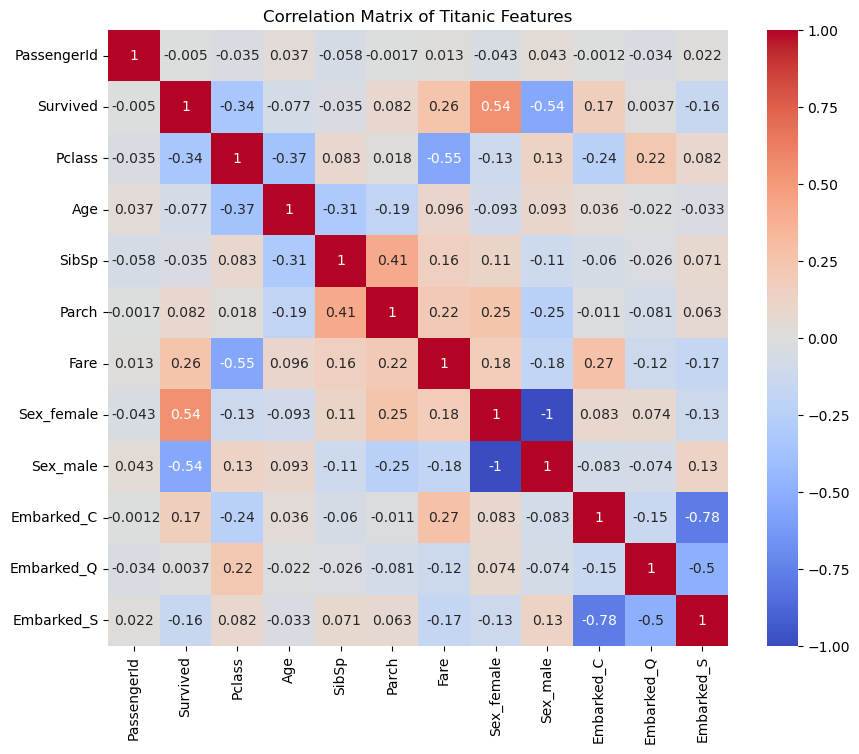

In [18]:
# 2. 進一步觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
# 從熱力圖可看出

# 轉換性別為1/0
df_titanic = titanic.copy()
df_titanic.dropna()
df_titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_titanic_ana = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked'])

#計算相關係數矩陣
corr_matrix = df_titanic_ana.corr()

#使用熱力圖視覺化相關係數矩陣
plt.figure(figsize = (10 , 8))
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')
plt.title('Correlation Matrix of Titanic Features')
plt.show()

In [ ]:
# 3. 承上題，請問你是如何定義與解讀什麼稱為「關係大」呢？
# 相關係數（Correlation Coefficient）：可以使用相關係數來評估數值型欄位與目標變數之間的線性相關性。
# 相關係數的範圍在 -1 到 1 之間，越接近 1 表示正相關，越接近 -1 表示負相關，接近 0 則表示沒有線性相關性。

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

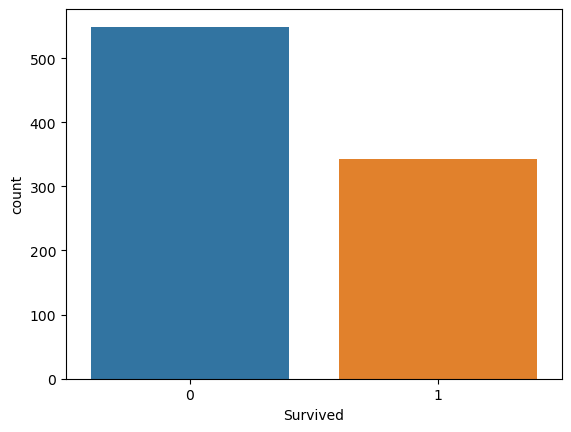

In [4]:
print(titanic['Survived'].value_counts())
sns.countplot(x='Survived',data=titanic)

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

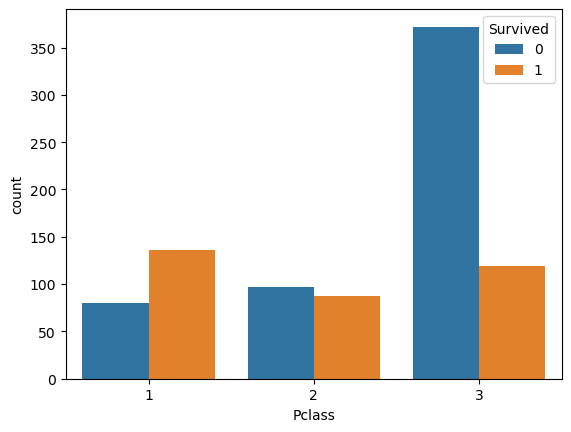

In [5]:
print(titanic.groupby('Pclass')['Survived'].value_counts())
sns.countplot(x='Pclass', hue='Survived',data=titanic)

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

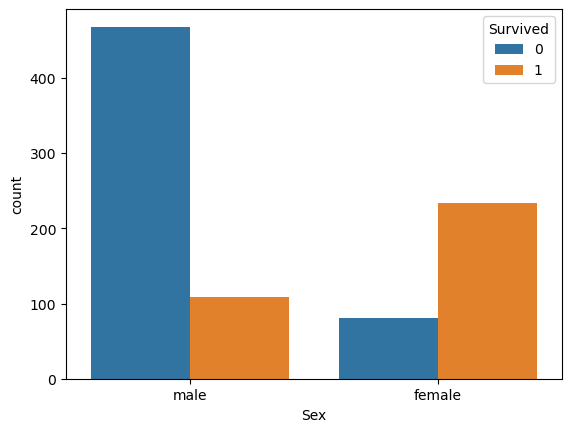

In [6]:
print(titanic.groupby('Sex')['Survived'].value_counts())
sns.countplot(x='Sex', hue='Survived',data=titanic)

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

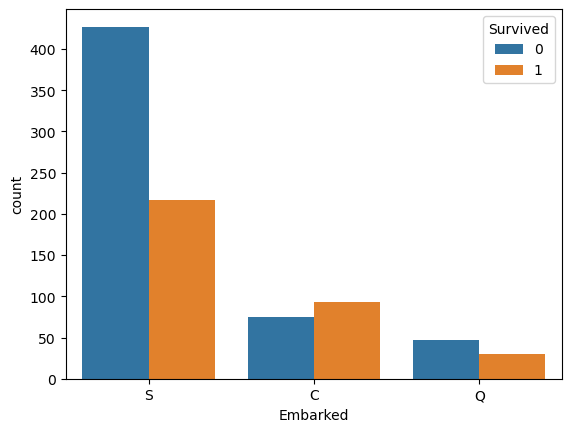

In [7]:
print(titanic.groupby('Embarked')['Survived'].value_counts())
sns.countplot(x='Embarked', hue='Survived',data=titanic)

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

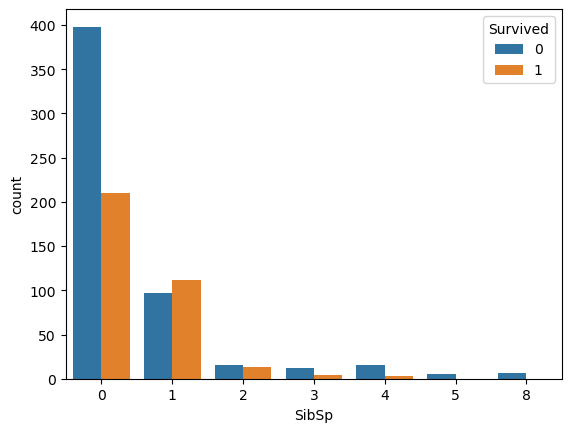

In [8]:
print(titanic.groupby('SibSp')['Survived'].value_counts())
sns.countplot(x='SibSp', hue='Survived',data=titanic)

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64


<Axes: xlabel='Parch', ylabel='count'>

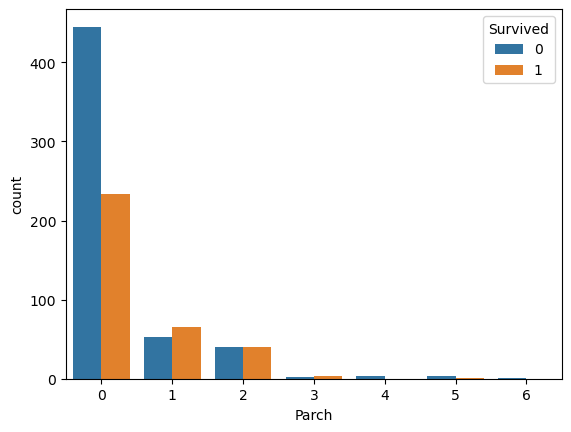

In [9]:
print(titanic.groupby('Parch')['Survived'].value_counts())
sns.countplot(x='Parch', hue='Survived',data=titanic)